In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import submission as s
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
data = s.load_train_data()
data.head()

,NAME,GROUP_ID,category,sub_category,low_category
id,,,,,
0,пиво жигулевский number литр св,35,Алкоголь,"Пиво, слабоалкогольные напитки",Прод
1,соус томатный буздяк number год татарский number,6,Прод,Продукты питания,Прод
2,сигарета esse ss exchange,7,Непрод,Табачные изделия,Непрод
3,петрушка,6,Прод,Продукты питания,Прод
4,пиво ягерь,35,Алкоголь,"Пиво, слабоалкогольные напитки",Прод


In [11]:
data[data['low_category'] == 'Прод']['NAME'].to_csv('data/products.csv', index=False)
data[data['low_category'] != 'Прод']['NAME'].to_csv('data/not_products.csv', index=False)

In [3]:
X = data[['NAME', 'low_category', 'category']]
y = data['sub_category']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
clf = s.build_estimators()

In [7]:
clf.fit(X_train, y_train)

Fitting
	Fitting ['NAME']
	Fitting ['NAME', 'low_category']
	Fitting ['NAME', 'low_category', 'category']


Estimator(estimators=[Pipeline(steps=[('selector', ItemSelector(key='NAME')), ('count_vectorizer', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=15000, min_df=1,
    ...(alpha=0.2, class_prior=None, fit_prior=True))],
         n_jobs=1, voting='soft', weights=None))])],
     n_jobs=1)

In [8]:
y_true, y_pred = y_test, clf.predict(X_test)

Predicting:
	Predicting step low_category. Columns: Index(['NAME'], dtype='object')
	Predicting step category. Columns: Index(['NAME', 'low_category'], dtype='object')
	Predicting step sub_category. Columns: Index(['NAME', 'low_category', 'category'], dtype='object')


In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


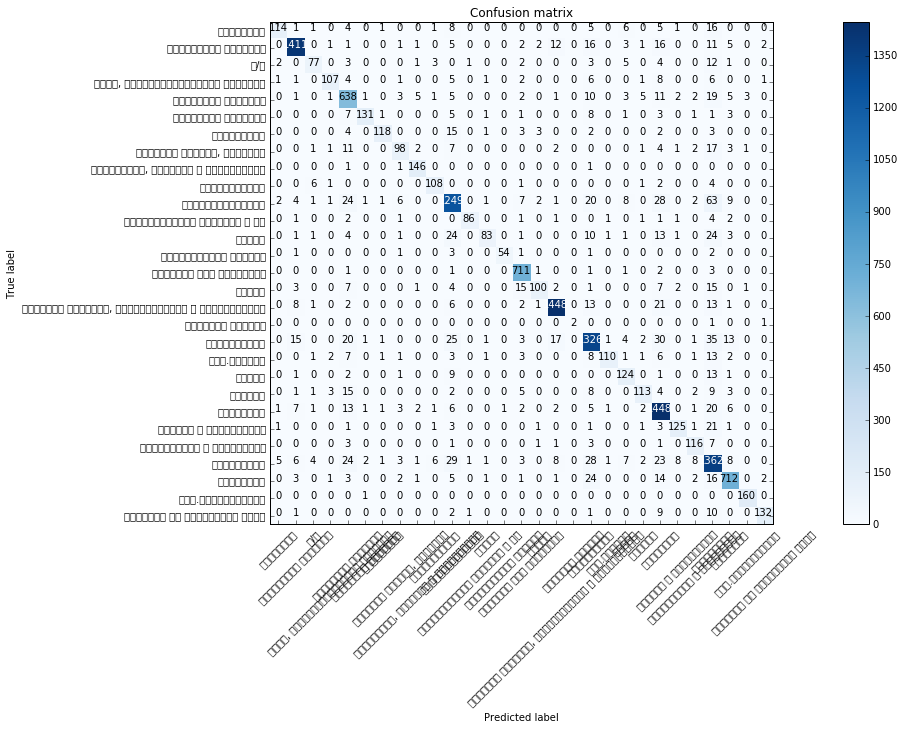

In [26]:
cnf_matrix = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cnf_matrix, y_true.unique())